In [1]:
import re
import datetime
import pathlib
import polars as pl # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [2]:
VERSION = datetime.datetime.now().strftime("%y%m%d")
print(f"Execute Date: {VERSION}")

Execute Date: 251213


## Parameters for papermill

In [3]:
foldseek_result_tsv = pathlib.Path("../test/oryza_sativa_test_202509/foldseek_os_random_9606.tsv")
query_uniprot_idmapping_tsv = pathlib.Path("../test/oryza_sativa_test_202509/rice_random_gene_idmapping_all.tsv")
water_result_dir_path = pathlib.Path("../test/oryza_sativa_test_202509/result_water")
needle_result_dir_path = pathlib.Path("../test/oryza_sativa_test_202509/result_needle")
query_gene_list_tsv_path = pathlib.Path("../test/oryza_sativa_test_202509/oryza_sativa_random_gene_list.tsv")
togoid_convert_tsv_path = pathlib.Path("../test/oryza_sativa_test_202509/foldseek_hit_species_togoid_convert.tsv")

In [4]:
# Parameters
foldseek_result_tsv = "/tmp/wqdhff23/stgc0cbe27c-622d-4b27-849d-6d6df0405ae8/foldseek_gm_100genes_9606_stringent.tsv"
query_uniprot_idmapping_tsv = "/tmp/wqdhff23/stge95d52a8-f7fa-470f-80c3-3aa4c5005360/gm_100_genes_idmapping_all.tsv"
water_result_dir_path = "/tmp/wqdhff23/stg36c10afc-e279-4dd5-b1ab-0589b0df67d2/result_water"
needle_result_dir_path = "/tmp/wqdhff23/stg802a1785-06dd-42e0-acb0-effd3722df3d/result_needle"
query_gene_list_tsv_path = "/tmp/wqdhff23/stgca134f05-0b8a-4807-a8f6-96429efc17f3/glycine_max_random_100genes_list.tsv"
togoid_convert_tsv_path = "/tmp/wqdhff23/stg8d9827ba-4be5-4145-8db3-b7efbc814817/foldseek_hit_species_togoid_convert_stringent.tsv"


In [5]:
foldseek_result_df = pl.read_csv(
    foldseek_result_tsv,
    separator='\t'
).with_columns(
    (pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession")), # "?" means non-greedy
    (pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit"))
)

foldseek_result = pl.read_csv(
    query_uniprot_idmapping_tsv, # query idmapping
    separator='\t'
).join(
    foldseek_result_df,
    on="UniProt Accession",
    how="inner",
    coalesce=True
)

display(foldseek_result)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,qaln,taln,mismatch,lddtfull
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,str,i64,str
"""GLYMA_17G116800""","""K7ML64""",null,0.000001,1.0,4,21.1,0.211,33,2,133,133,1004,1157,1400,156,0.992,0.11,0.6023,0.2365,0.03912,0.03912,15.11,"""SWSGGDWMCGVCEHINFKKREACQSCGYPK…","""TKKEGQWDCSVCLVRNEASATKCIACQNPG…",97,"""0.673,0.750,0.783,0.875,0.865,…"
"""GLYMA_17G116800""","""K7ML64""",null,2.6870e-7,1.0,5,21.7,0.217,34,6,133,133,145,298,1400,156,0.962,0.11,0.5566,0.2246,0.03385,0.03385,21.48,"""GDWMCGVCEHINFKKREACQSCGYPKYGGP…","""GQWDCSSCLVRNEANATRCVACQNPDKPSP…",92,"""0.719,0.786,0.788,0.714,0.600,…"
"""GLYMA_17G116800""","""K7ML64""",null,8.3190e-7,1.0,5,20.7,0.207,34,2,133,133,804,957,1400,164,0.992,0.11,0.6113,0.2277,0.03221,0.03221,19.13,"""SWSGGDWMCGVCEHINFKKREACQSCGYPK…","""TKKEGQWDCSVCLVRNEASATKCIACQNPG…",88,"""0.673,0.765,0.783,0.911,0.875,…"
"""GLYMA_17G116800""","""K7ML64""",null,4.0040e-7,1.0,6,21.8,0.218,36,1,133,133,3,157,1400,165,1.0,0.111,0.5619,0.2282,0.04171,0.04171,16.81,"""MSWSGGDWMCGVCEHINFKKREACQSCGYP…","""FTKKEGQWDCSVCLVRNEASATKCIACQNP…",87,"""0.712,0.673,0.765,0.800,0.911,…"
"""GLYMA_17G116800""","""K7ML64""","""P49790""",0.000002,1.0,5,20.6,0.206,34,6,133,133,724,884,1475,165,0.962,0.109,0.5887,0.2315,0.03066,0.03066,17.7,"""GDWMCGVCEHINFKKREACQSCGYPKYGGP…","""GTWDCDTCLVQNKPEAIKCVACETPKPGTC…",90,"""0.750,0.795,0.780,0.729,0.637,…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""GLYMA_19G207500""","""A0A0R0F290""","""Q01804""",0.000001,1.0,7,23.9,0.239,39,162,323,324,24,154,1114,163,0.5,0.118,0.6101,0.3401,0.107,0.107,4.409,"""KLEKKLKPLGLTVCEIKPDGHCLYRAIEDQ…","""PMDAYLRKLGLYRKLVAKDGSCLFRAVAEQ…",91,"""0.451,0.582,0.585,0.568,0.592,…"
"""GLYMA_19G207500""","""A0A0R0F290""","""Q5VV17""",0.000001,1.0,9,23.1,0.231,51,114,324,324,270,438,481,220,0.651,0.351,0.6002,0.3575,0.2468,0.2468,10.46,"""SVTSQPEHTKVSKAKQRRDKRAQQEAEREQ…","""APSSAAEPVIVSRSDPRDEKLAL-------…",109,"""0.194,0.155,0.263,0.342,0.483,…"
"""GLYMA_19G207500""","""A0A0R0F290""","""Q5VVQ6""",0.00004,1.0,8,17.6,0.176,27,172,321,324,149,271,348,153,0.463,0.353,0.5377,0.3044,0.2853,0.2853,4.588,"""LTVCEIKPDGHCLYRAIEDQLAILSGG-RS…","""LTRTVVPADNSCLF---TSVYYVVEGGVLN…",93,"""0.403,0.435,0.464,0.505,0.540,…"


&nbsp;

&nbsp;

## Create Scatter Plot for all hits (Strucutural alignment identity vs LDDT)

- Identity in the results of the structural alignment is also output in the foldseek output.
- However, in this notebook, you can also select the results of the pairwise alignment of amino acid sequences (global alignment, local alignment).

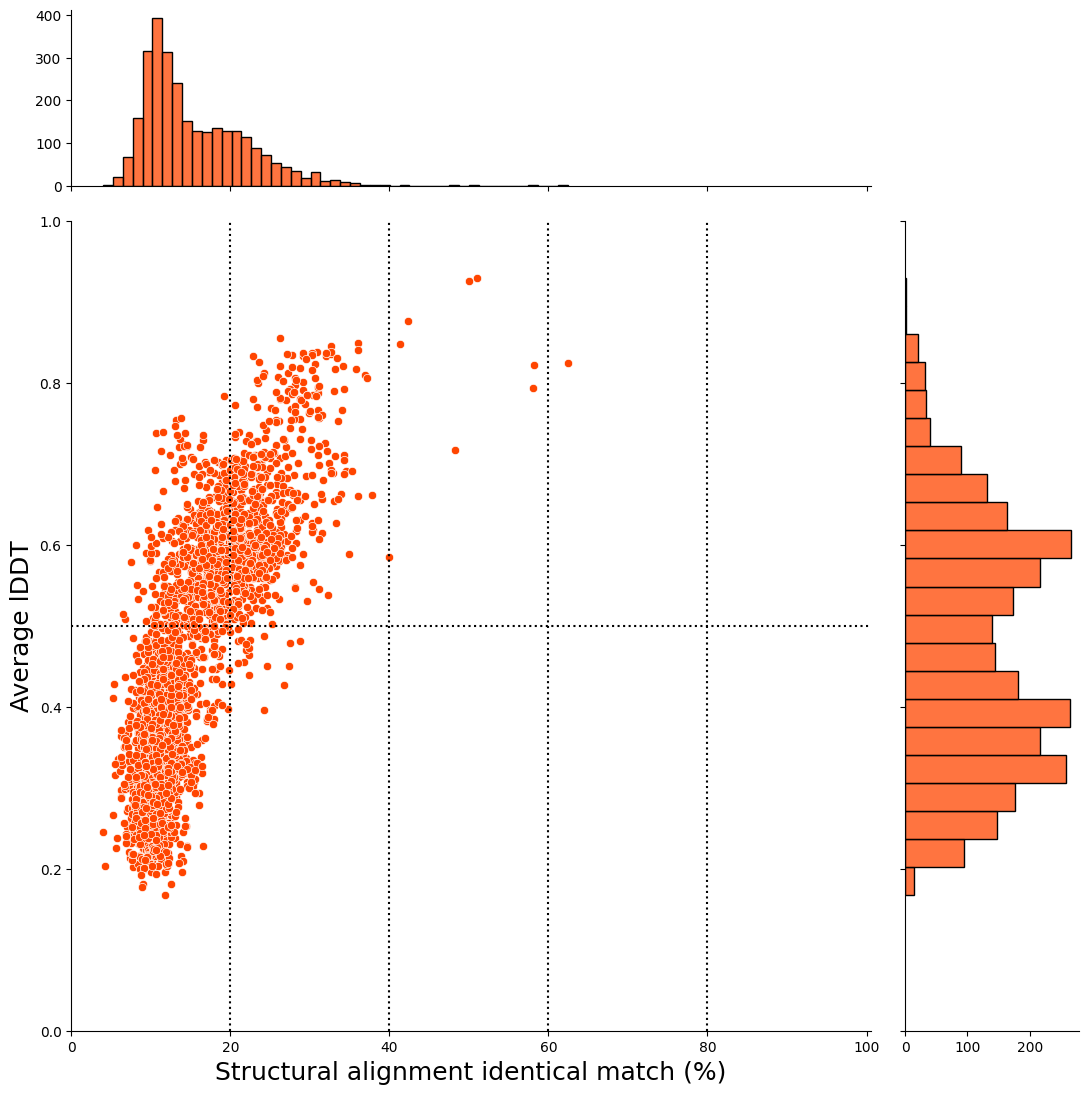

In [6]:
foldseek_filter_viz = foldseek_result.to_pandas()
sns.jointplot(
    data=foldseek_filter_viz,
    x="pident", # structural alignment identical match from foldseek result
    y="lddt",
    color="orangered",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(0,100.5)
plt.ylim(0,1)
plt.xlabel("Structural alignment identical match (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Parse pairwise alignment result (water and needle)

In [7]:
def parse_needle_water_result(file_path: str):
    with open(file_path, "r", encoding="utf-8") as file:
        data = file.readlines()
        
    result = {
        "UniProt Accession": None,
        "foldseek hit": None,
        "Length": None,
        "Identity": None,
        "Identity_percent": None,
        "Similarity": None,
        "Similarity_percent": None,
        "Gaps": None,
        "Gaps_percent": None,
        "Score": None
    }
    
    for line in data:
        if line.startswith('# 1:'):
            result['UniProt Accession'] = line.split(':')[1].strip()
        elif line.startswith('# 2:'):
            result['foldseek hit'] = line.split(':')[1].strip()
        elif line.startswith('# Length:'):
            result['Length'] = int(line.split()[2])
        elif line.startswith('# Identity:'):
            result['Identity'] = line.split()[2]
            result['Identity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Similarity:'):
            result['Similarity'] = line.split()[2]
            result['Similarity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Gaps:'):
            result['Gaps'] = line.split()[2]
            result['Gaps_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Score:'):
            result['Score'] = float(line.split()[2])
            
    return result

In [8]:
water_result_dir = pathlib.Path(water_result_dir_path)
needle_result_dir = pathlib.Path(needle_result_dir_path)

# Initialize empty lists to store DataFrames
water_dfs = []
needle_dfs = []

# Collect all water results
for result_file in water_result_dir.glob("*_align.water"):
    parsed_data = parse_needle_water_result(result_file)
    water_dfs.append(pl.DataFrame([parsed_data]))

# Collect all needle results    
for result_file in needle_result_dir.glob("*_align.needle"):
    parsed_data = parse_needle_water_result(result_file)
    needle_dfs.append(pl.DataFrame([parsed_data]))

# Combine all results and sort only if there are results
water_result = (pl.concat(water_dfs, how='vertical')
                .sort(["UniProt Accession", "foldseek hit"]) 
                if water_dfs else pl.DataFrame()).with_columns(
                    pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession"), # add removing AF- prefix
                    pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit") # add removing AF- prefix
                )

needle_result = (pl.concat(needle_dfs, how='vertical')
                 .sort(["UniProt Accession", "foldseek hit"])
                 if needle_dfs else pl.DataFrame()).with_columns(
                    pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession"), # add removing AF- prefix
                    pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit") # add removing AF- prefix
                )

display(water_result)
display(needle_result)

UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A0A0R0EI55""","""A2RU54""",80,"""21/80""",26.2,"""33/80""",41.2,"""26/80""",32.5,61.5
"""A0A0R0EI55""","""A6NJ46""",127,"""31/127""",24.4,"""42/127""",33.1,"""21/127""",16.5,46.5
"""A0A0R0EI55""","""A6NMT0""",249,"""49/249""",19.7,"""67/249""",26.9,"""110/249""",44.2,38.5
"""A0A0R0EI55""","""A8MTQ0""",50,"""11/50""",22.0,"""22/50""",44.0,"""4/50""",8.0,36.5
"""A0A0R0EI55""","""O95076""",27,"""10/27""",37.0,"""13/27""",48.1,"""1/27""",3.7,44.0
…,…,…,…,…,…,…,…,…,…
"""K7N154""","""P55769""",88,"""18/88""",20.5,"""35/88""",39.8,"""18/88""",20.5,52.5
"""K7N154""","""P62424""",57,"""16/57""",28.1,"""23/57""",40.4,"""8/57""",14.0,49.5
"""K7N154""","""P62888""",129,"""23/129""",17.8,"""50/129""",38.8,"""44/129""",34.1,49.5


UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A0A0R0EI55""","""A2RU54""",329,"""41/329""",12.5,"""73/329""",22.2,"""173/329""",52.6,43.5
"""A0A0R0EI55""","""A6NJ46""",318,"""50/318""",15.7,"""70/318""",22.0,"""159/318""",50.0,38.5
"""A0A0R0EI55""","""A6NMT0""",394,"""56/394""",14.2,"""78/394""",19.8,"""233/394""",59.1,29.0
"""A0A0R0EI55""","""A8MTQ0""",425,"""11/425""",2.6,"""13/425""",3.1,"""387/425""",91.1,18.0
"""A0A0R0EI55""","""O95076""",392,"""42/392""",10.7,"""71/392""",18.1,"""229/392""",58.4,34.5
…,…,…,…,…,…,…,…,…,…
"""K7N154""","""P55769""",165,"""29/165""",17.6,"""58/165""",35.2,"""47/165""",28.5,36.5
"""K7N154""","""P62424""",301,"""30/301""",10.0,"""50/301""",16.6,"""181/301""",60.1,19.0
"""K7N154""","""P62888""",179,"""26/179""",14.5,"""55/179""",30.7,"""88/179""",49.2,41.0


In [9]:
alignment_result = water_result.join(
    needle_result,
    on=["UniProt Accession", "foldseek hit"],
    how="inner",
    coalesce=True,
    suffix="_needle"
).rename(
    {
        "Length": "Length_water",
        "Identity": "Identity_water",
        "Identity_percent": "Identity_percent_water",
        "Similarity": "Similarity_water",
        "Similarity_percent": "Similarity_percent_water",
        "Gaps": "Gaps_water",
        "Gaps_percent": "Gaps_percent_water",
        "Score": "Score_water"
    }
).select(
    [
        "UniProt Accession",
        "foldseek hit",
        "Length_water",
        "Length_needle",
        "Identity_water",
        "Identity_needle",
        "Identity_percent_water",
        "Identity_percent_needle",
        "Similarity_percent_water",
        "Similarity_percent_needle",
        "Gaps_water",
        "Gaps_needle",
        "Gaps_percent_water",
        "Gaps_percent_needle",
        "Score_water",
        "Score_needle"
    ]
)

display(alignment_result)

UniProt Accession,foldseek hit,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""A0A0R0EI55""","""A2RU54""",80,329,"""21/80""","""41/329""",26.2,12.5,41.2,22.2,"""26/80""","""173/329""",32.5,52.6,61.5,43.5
"""A0A0R0EI55""","""A6NJ46""",127,318,"""31/127""","""50/318""",24.4,15.7,33.1,22.0,"""21/127""","""159/318""",16.5,50.0,46.5,38.5
"""A0A0R0EI55""","""A6NMT0""",249,394,"""49/249""","""56/394""",19.7,14.2,26.9,19.8,"""110/249""","""233/394""",44.2,59.1,38.5,29.0
"""A0A0R0EI55""","""A8MTQ0""",50,425,"""11/50""","""11/425""",22.0,2.6,44.0,3.1,"""4/50""","""387/425""",8.0,91.1,36.5,18.0
"""A0A0R0EI55""","""O95076""",27,392,"""10/27""","""42/392""",37.0,10.7,48.1,18.1,"""1/27""","""229/392""",3.7,58.4,44.0,34.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""K7N154""","""P55769""",88,165,"""18/88""","""29/165""",20.5,17.6,39.8,35.2,"""18/88""","""47/165""",20.5,28.5,52.5,36.5
"""K7N154""","""P62424""",57,301,"""16/57""","""30/301""",28.1,10.0,40.4,16.6,"""8/57""","""181/301""",14.0,60.1,49.5,19.0
"""K7N154""","""P62888""",129,179,"""23/129""","""26/179""",17.8,14.5,38.8,30.7,"""44/129""","""88/179""",34.1,49.2,49.5,41.0


&nbsp;


&nbsp;

## Integrate foldseek result and pairwise alignment result

- This time, **exclude the ones that are null in pairwise alignment result, which means the current UniProt entry is obsolete**

In [10]:
join_foldseek = foldseek_result.join(
    alignment_result,
    on=["UniProt Accession", "foldseek hit"],
    how="left",
    coalesce=True
).filter( # filter out null alignment result (this means current UniProt entry is obsolete)
    pl.col("Length_water").is_not_null() & 
    pl.col("Length_needle").is_not_null()
).unique()


print(join_foldseek.group_by(["UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(join_foldseek.head())

shape: (2_493, 41)
┌─────────────┬────────────┬──────┬────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ UniProt     ┆ foldseek   ┆ From ┆ evalue ┆ … ┆ Gaps_perce ┆ Gaps_perce ┆ Score_wate ┆ Score_need │
│ Accession   ┆ hit        ┆ ---  ┆ ---    ┆   ┆ nt_water   ┆ nt_needle  ┆ r          ┆ le         │
│ ---         ┆ ---        ┆ u32  ┆ u32    ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│ str         ┆ str        ┆      ┆        ┆   ┆ u32        ┆ u32        ┆ u32        ┆ u32        │
╞═════════════╪════════════╪══════╪════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ A0A0R0KQN1  ┆ Q9UBS0     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ I1N264      ┆ O00182     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ I1MBN8      ┆ P11177     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ K7LU17      ┆ Q8IYL2     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1         

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""GLYMA_02G009200""","""A0A0R0KQN1""","""Q9UBS0""",3.6310e-16,1.0,20,21.5,0.215,81,57,400,451,12,329,482,376,0.763,0.66,0.5863,0.4972,0.4668,0.4668,10.76,"""VNASSVAVERLPDEMNGMKIRDER------…","""EEGSEGEGEPELSPADACPLAELRAAGLEP…",205,"""0.500,0.625,0.611,0.844,0.833,…",320,600,"""83/320""","""103/600""",25.9,17.2,45.3,30.5,"""74/320""","""267/600""",23.1,44.5,235.5,208.5
"""GLYMA_18G165700""","""I1N264""","""O00182""",0.0006628,0.998,9,11.6,0.116,19,66,224,289,18,149,355,163,0.55,0.372,0.3442,0.3094,0.2641,0.2641,5.428,"""GFRSKLEYASGFFQMRIKIPNKDCRGVVTA…","""SGTIQGGLQDGLQITVNGTVLSSSGTRFAV…",109,"""0.345,0.309,0.332,0.358,0.280,…",160,542,"""30/160""","""24/542""",18.8,4.4,34.4,8.7,"""53/160""","""440/542""",33.1,81.2,40.5,18.0
"""GLYMA_14G207700""","""I1MBN8""","""P11177""",0.0006755,0.991,23,9.3,0.093,35,1,333,566,31,358,359,375,0.588,0.914,0.3678,0.2562,0.3848,0.3848,17.02,"""MEIDGNVLAAKSL---VHFGVQHMFGVV--…","""LQVTVRDAINQGMDEELERDEKVFLLGEEV…",251,"""0.653,0.630,0.549,0.615,0.585,…",247,710,"""52/247""","""59/710""",21.1,8.3,34.8,13.9,"""62/247""","""495/710""",25.1,69.7,72.5,64.0
"""GLYMA_12G103300""","""K7LU17""","""Q8IYL2""",0.000031,0.999,14,10.0,0.1,22,101,260,260,301,508,757,218,0.615,0.275,0.392,0.3471,0.1387,0.1387,11.2,"""KV-LSFSLLFRDHLLPLLLSAASSN-----…","""KYSKAYQELKEKYKEMVKVWPEVTDPEKFV…",128,"""0.150,0.189,0.288,0.298,0.195,…",228,949,"""55/228""","""19/949""",24.1,2.0,35.1,3.2,"""90/228""","""881/949""",39.5,92.8,39.0,26.0
"""GLYMA_12G092400""","""K7LTV3""","""P02545""",0.05685,0.098,10,9.3,0.093,19,3,165,207,370,547,664,204,0.787,0.268,0.3435,0.136,0.05842,0.05842,35.34,"""NSTTLKVVSVVISAFAIVQMALAGDPDILS…","""DMEIHAYRKLLEGEEERLRLSPSPTSQRSR…",118,"""0.750,0.833,0.846,0.839,0.867,…",125,821,"""25/125""","""14/821""",20.0,1.7,33.6,3.2,"""59/125""","""771/821""",47.2,93.9,34.5,12.5


&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Create Scatter Plot for all hits (x-axis: Similarity_percent_needle) Global alignment

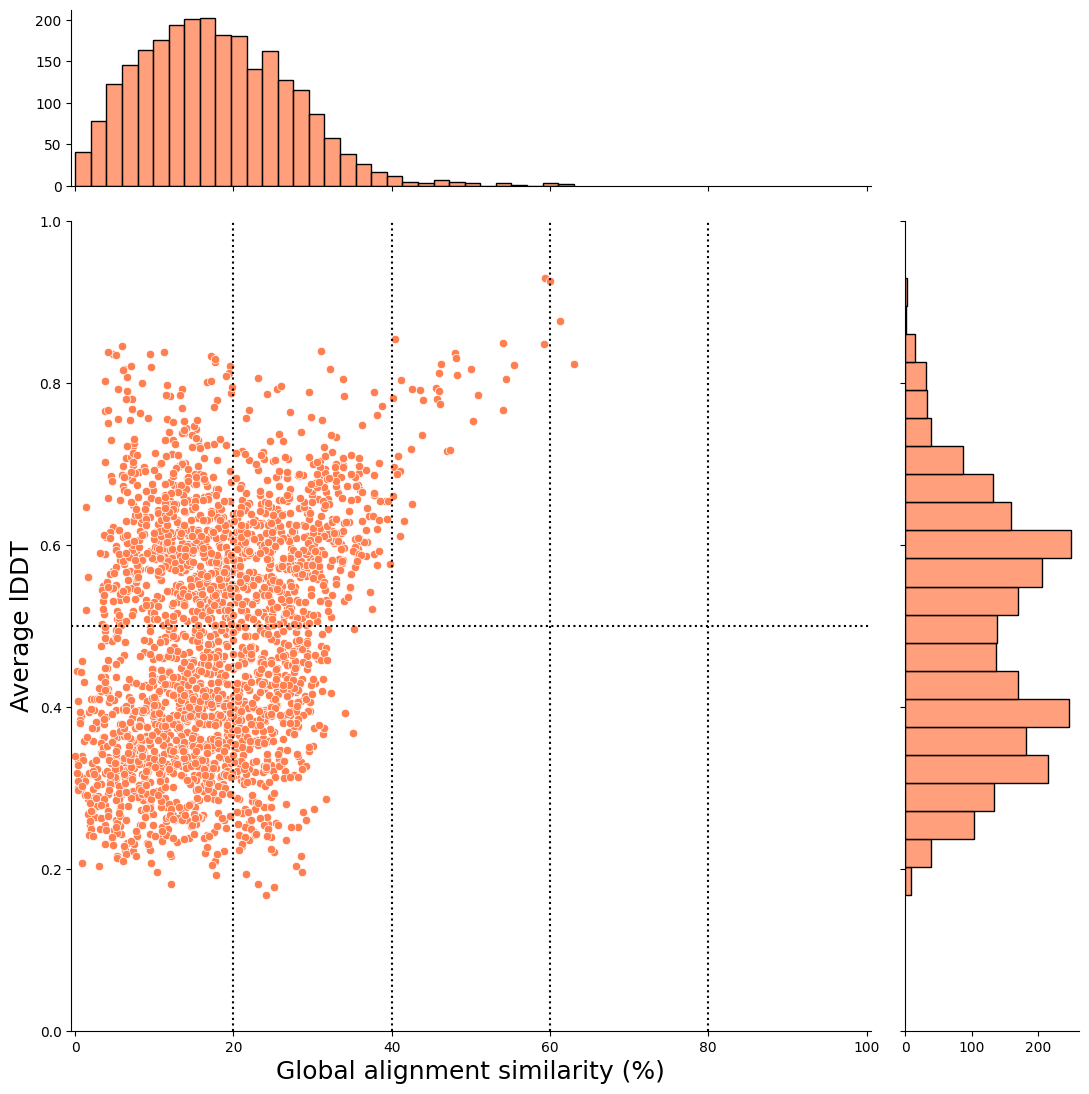

In [11]:
foldseek_filter_viz2 = join_foldseek.to_pandas()

sns.jointplot(
    data=foldseek_filter_viz2,
    x="Similarity_percent_needle",
    y="lddt",
    color="coral",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100.5)
plt.ylim(0,1)
plt.xlabel("Global alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;


## Create Scatter Plot for all hits (x-axis: Similarity_percent_water) Local Alignment

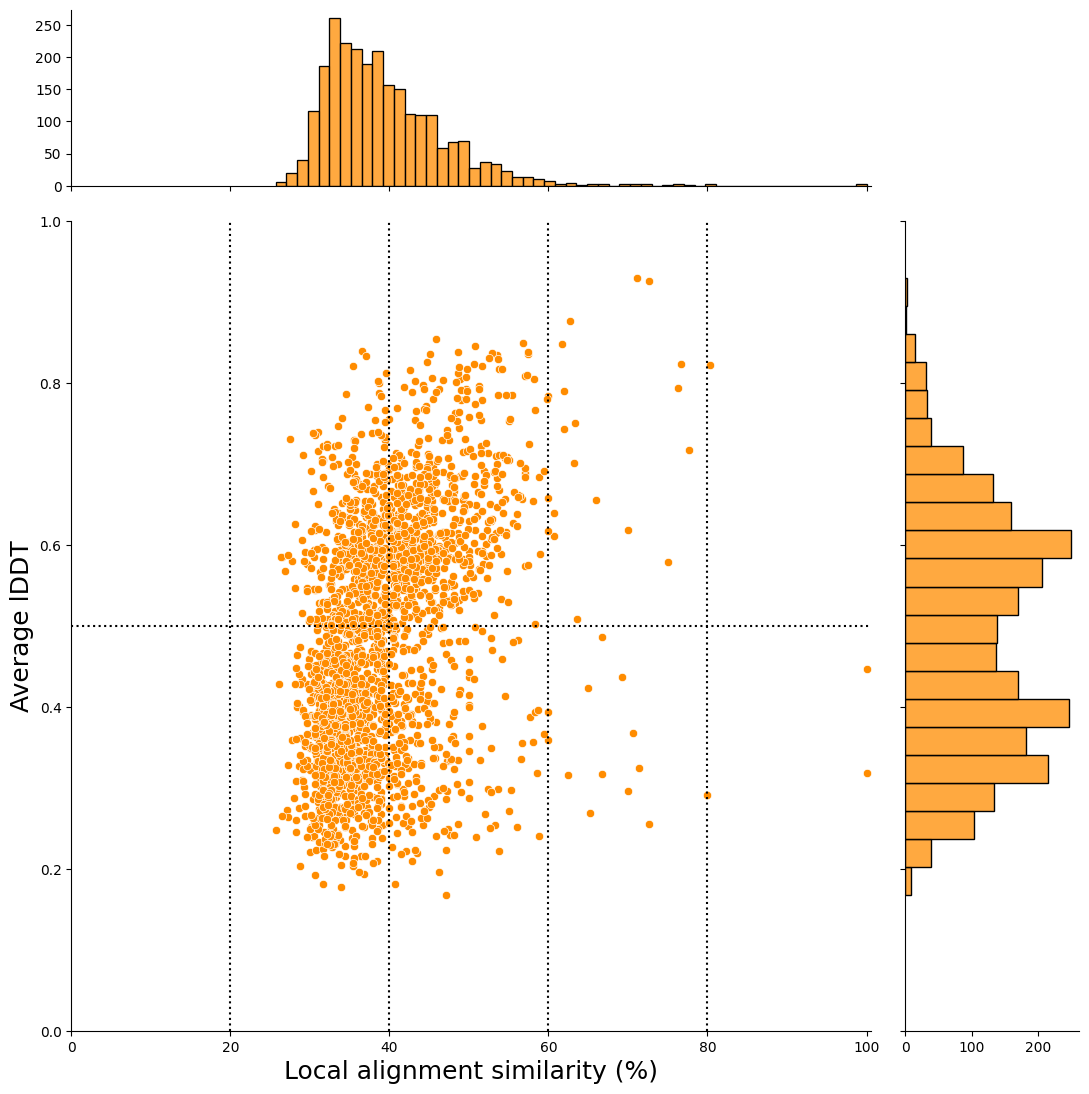

In [12]:
foldseek_filter_viz2 = join_foldseek.to_pandas()

sns.jointplot(
    data=foldseek_filter_viz2,
    x="Similarity_percent_water", # local alignment similarity
    y="lddt",
    color="darkorange",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(0,100.5)
plt.ylim(0,1)
plt.xlabel("Local alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Counting foldseek hits in Gene level

In [13]:
all_gene_list = pl.read_csv(
    query_gene_list_tsv_path,
    separator='\t'
).select(
    "From"
).unique()

hit_count = all_gene_list.join(
    join_foldseek,
    on="From",
    how="left",
    coalesce=True
).group_by("From", maintain_order=True).agg(
    (pl.col("foldseek hit").count().alias("target hit count (gene level vs uniprot accession)")),
    (pl.col("foldseek hit").is_null().all().alias("foldseek no hit"))
).sort(
    ["target hit count (gene level vs uniprot accession)"], descending=True
)

display(hit_count)

From,target hit count (gene level vs uniprot accession),foldseek no hit
str,u32,bool
"""GLYMA_02G009200""",255,false
"""GLYMA_04G069400""",235,false
"""GLYMA_04G233600""",206,false
"""GLYMA_12G092400""",169,false
"""GLYMA_18G165700""",155,false
…,…,…
"""GLYMA_18G214400""",0,true
"""GLYMA_02G010600""",0,true
"""GLYMA_05G179800""",0,true


&nbsp;

&nbsp;

&nbsp;

# Caution:
- The filtering steps that are executed below can be changed freely.

&nbsp;

## Filtering Condition1

- alignment coverage >= 0.5

In [14]:
condition1 = join_foldseek.filter(
        (pl.col("qcov") >= 0.5) &
        (pl.col("tcov") >= 0.5)
    ).sort(
        by=["From", "foldseek hit", "UniProt Accession"], # sort by From, foldseek hit, UniProt Accession
        descending=[False, False, False]
    )

condition1_rm = condition1.filter(
        (pl.col("qcov") < 0.5) |
        (pl.col("tcov") < 0.5)
    )

print(condition1.group_by(["From"], maintain_order=True).n_unique())
display(condition1)

shape: (51, 41)
┌────────────┬────────────┬───────────┬────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek  ┆ evalue ┆ … ┆ Gaps_perc ┆ Gaps_perc ┆ Score_wat ┆ Score_nee │
│ ---        ┆ Accession  ┆ hit       ┆ ---    ┆   ┆ ent_water ┆ ent_needl ┆ er        ┆ dle       │
│ str        ┆ ---        ┆ ---       ┆ u32    ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---       │
│            ┆ u32        ┆ u32       ┆        ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32       │
│            ┆            ┆           ┆        ┆   ┆           ┆ u32       ┆           ┆           │
╞════════════╪════════════╪═══════════╪════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ GLYMA_01G0 ┆ 1          ┆ 7         ┆ 7      ┆ … ┆ 6         ┆ 7         ┆ 7         ┆ 6         │
│ 80400      ┆            ┆           ┆        ┆   ┆           ┆           ┆           ┆           │
│ GLYMA_02G0 ┆ 1          ┆ 152       ┆ 133    ┆ … ┆ 111       ┆ 118       

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""GLYMA_01G080400""","""I1J6J3""","""O14713""",0.04588,0.164,11,9.9,0.099,23,3,201,204,7,189,200,232,0.975,0.915,0.4133,0.1528,0.1553,0.1553,21.34,"""YNHTSSMSLPSPLYLNTTSFRLTRQSPFPF…","""KRHSSSSSQSSEISTKSKSVDSSLGG----…",127,"""0.583,0.607,0.656,0.781,0.812,…",93,266,"""21/93""","""43/266""",22.6,16.2,33.3,26.7,"""40/93""","""128/266""",43.0,48.1,36.0,16.0
"""GLYMA_01G080400""","""I1J6J3""","""P86397""",0.0000225,1.0,8,7.5,0.075,14,40,190,204,3,167,168,185,0.74,0.982,0.5789,0.433,0.5166,0.5166,14.95,"""PAFRSVSPLSSS---------PSASLFDLR…","""PLISSHHLWWGGLRRTVCLNLPVLTLQHFQ…",117,"""0.375,0.556,0.550,0.700,0.806,…",12,246,"""5/12""","""39/246""",41.7,15.9,75.0,27.2,"""0/12""","""120/246""",0.0,48.8,34.0,23.5
"""GLYMA_01G080400""","""I1J6J3""","""Q5T1C6""",0.000031,1.0,5,9.7,0.097,13,56,181,204,114,236,240,134,0.618,0.512,0.6187,0.4437,0.3802,0.3802,11.01,"""LFDLRGGKG-----MSG---FHDVELKVRD…","""SFD-DGLGFEYVMFYNDIEKRMVCLFQGGP…",102,"""0.225,0.104,0.141,0.171,0.114,…",10,351,"""6/10""","""26/351""",60.0,7.4,70.0,14.0,"""0/10""","""258/351""",0.0,73.5,30.0,20.0
"""GLYMA_01G080400""","""I1J6J3""","""Q8N1Q8""",0.000069,1.0,6,10.6,0.106,17,42,176,204,98,237,247,159,0.662,0.567,0.5901,0.395,0.3295,0.3295,15.42,"""FRSVSPLSSSPSA-------SLFDLRGGKG…","""LKLPSGLAVSSDKGDCRIFTRCIQVEGQ--…",99,"""0.425,0.400,0.500,0.450,0.625,…",29,338,"""10/29""","""35/338""",34.5,10.4,51.7,17.2,"""2/29""","""225/338""",6.9,66.6,37.5,24.5
"""GLYMA_01G080400""","""I1J6J3""","""Q8WUY1""",4.2120e-7,1.0,5,16.9,0.169,28,59,203,204,36,199,208,165,0.711,0.788,0.6715,0.5138,0.5043,0.5043,13.28,"""LRGGKGMS--GFHDVELKVRDYELDQYGVV…","""LLQPRVRDLLAEQRFPGRVLPSDLDLLLHM…",116,"""0.140,0.224,0.193,0.204,0.207,…",136,235,"""31/136""","""46/235""",22.8,19.6,36.0,31.5,"""23/136""","""58/235""",16.9,24.7,44.5,30.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""GLYMA_20G108600""","""I1NFA5""","""P35680""",0.02052,0.214,12,14.2,0.142,49,1,303,303,214,537,557,344,1.0,0.582,0.67,0.1208,0.07338,0.07338,50.85,"""MGSCGREGSVRQYVRSKVPRLR--WTPELH…","""HGPGQSDDACSEPTNKKMRRNRFKWGPASQ…",234,"""0.812,0.875,0.958,0.781,0.694,…",246,592,"""47/246""","""73/592""",19.1,12.3,32.5,20.8,"""80/246""","""324/592""",32.5,54.7,68.0,52.5
"""GLYMA_20G108600""","""I1NFA5""","""P48742""",0.0823,0.301,8,14.6,0.146,40,2,267,303,164,404,406,273,0.878,0.594,0.7227,0.1741,0.1343,0.1343,44.08,"""GSCGREGSVRQYVRSK--VPRLRWTPELHR…","""KEAGSNENDDQNLGAKRRGPRTTIKAKQLE…",194,"""0.583,0.750,0.656,0.583,0.667,…",128,505,"""22/128""","""52/505""",17.2,10.3,33.6,19.0,"""39/128""","""301/505""",30.5,59.6,39.5,20.0
"""GLYMA_20G108600""","""I1NFA5""","""Q8N9Y4""",0.03622,0.09,8,11.5,0.115,35,1,290,303,40,331,354,303,0.957,0.825,0.6668,0.07912,0.07953,0.07953,33.76,"""MGSCGREGSV--RQYVRSKVPRLRWTPELH…","""LGAAGHQQSLPSSWKASCSGPLVMASDSDV…",244,"""1.000,1.000,0.875,0.812,0.861,…",303,433,"""61/303""","""68/433""",20.1,15.7,30.4,23.3,"""122/303""","""209/433""",40.3,48.3,53.5,27.5


&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Filtering Condition2

- If there are hits with the same target for the same gene-derived UniProt ID, the one with the highest qcov is selected, and if the qcov is the same, the one with the highest lDDT is selected.
- **Note that in this study, we leave the states with the same foldseek hit even if the rice genes are different.**

In [15]:
condition2 = condition1.sort(
    by=["qcov", "lddt"],
    descending=[True, True]
).group_by(
    ["From", "foldseek hit"],
    maintain_order=True
).agg(
    pl.all().first()
).sort(
    by=["From", "UniProt Accession", "foldseek hit"],
    descending=[False, False, False]
).select(
    "From",
    "UniProt Accession",
    "foldseek hit",
    "evalue",
    "prob",
    "gapopen",
    "pident",
    "fident",
    "nident",
    "qstart",
    "qend",
    "qlen",
    "tstart",
    "tend",
    "tlen",
    "alnlen",
    "qcov",
    "tcov",
    "lddt",
    "qtmscore",
    "ttmscore",
    "alntmscore",
    "rmsd",
    "mismatch",
    "Length_water",
    "Length_needle",
    "Identity_water",
    "Identity_needle",
    "Identity_percent_water",
    "Identity_percent_needle",
    "Similarity_percent_water",
    "Similarity_percent_needle",
    "Gaps_water",
    "Gaps_percent_water",
    "Gaps_needle",
    "Gaps_percent_needle",
    "Score_water",
    "Score_needle"
)

display(condition2)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,mismatch,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_percent_water,Gaps_needle,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,str,str,f64,f64,f64,f64,str,f64,str,f64,f64,f64
"""GLYMA_01G080400""","""I1J6J3""","""O14713""",0.04588,0.164,11,9.9,0.099,23,3,201,204,7,189,200,232,0.975,0.915,0.4133,0.1528,0.1553,0.1553,21.34,127,93,266,"""21/93""","""43/266""",22.6,16.2,33.3,26.7,"""40/93""",43.0,"""128/266""",48.1,36.0,16.0
"""GLYMA_01G080400""","""I1J6J3""","""P86397""",0.0000225,1.0,8,7.5,0.075,14,40,190,204,3,167,168,185,0.74,0.982,0.5789,0.433,0.5166,0.5166,14.95,117,12,246,"""5/12""","""39/246""",41.7,15.9,75.0,27.2,"""0/12""",0.0,"""120/246""",48.8,34.0,23.5
"""GLYMA_01G080400""","""I1J6J3""","""Q5T1C6""",0.000031,1.0,5,9.7,0.097,13,56,181,204,114,236,240,134,0.618,0.512,0.6187,0.4437,0.3802,0.3802,11.01,102,10,351,"""6/10""","""26/351""",60.0,7.4,70.0,14.0,"""0/10""",0.0,"""258/351""",73.5,30.0,20.0
"""GLYMA_01G080400""","""I1J6J3""","""Q8N1Q8""",0.000069,1.0,6,10.6,0.106,17,42,176,204,98,237,247,159,0.662,0.567,0.5901,0.395,0.3295,0.3295,15.42,99,29,338,"""10/29""","""35/338""",34.5,10.4,51.7,17.2,"""2/29""",6.9,"""225/338""",66.6,37.5,24.5
"""GLYMA_01G080400""","""I1J6J3""","""Q8WUY1""",4.2120e-7,1.0,5,16.9,0.169,28,59,203,204,36,199,208,165,0.711,0.788,0.6715,0.5138,0.5043,0.5043,13.28,116,136,235,"""31/136""","""46/235""",22.8,19.6,36.0,31.5,"""23/136""",16.9,"""58/235""",24.7,44.5,30.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""GLYMA_20G075800""","""A0A0R0EI55""","""Q9UD57""",0.008106,0.747,6,13.6,0.136,29,1,212,212,51,222,310,212,1.0,0.555,0.6165,0.2305,0.1624,0.1624,31.49,143,48,371,"""14/48""","""40/371""",29.2,10.8,41.7,17.3,"""16/48""",33.3,"""220/371""",59.3,31.5,19.5
"""GLYMA_20G108600""","""I1NFA5""","""P35680""",0.02052,0.214,12,14.2,0.142,49,1,303,303,214,537,557,344,1.0,0.582,0.67,0.1208,0.07338,0.07338,50.85,234,246,592,"""47/246""","""73/592""",19.1,12.3,32.5,20.8,"""80/246""",32.5,"""324/592""",54.7,68.0,52.5
"""GLYMA_20G108600""","""I1NFA5""","""P48742""",0.0823,0.301,8,14.6,0.146,40,2,267,303,164,404,406,273,0.878,0.594,0.7227,0.1741,0.1343,0.1343,44.08,194,128,505,"""22/128""","""52/505""",17.2,10.3,33.6,19.0,"""39/128""",30.5,"""301/505""",59.6,39.5,20.0


&nbsp;

&nbsp;

&nbsp;

## Filtering Condition3

- Select hits that can be converted to Ensembl gene id and HGNC Gene nomenclature with TogoID API
- https://togoid.dbcls.jp/

In [16]:
togoid_convert = pl.read_csv(
    togoid_convert_tsv_path,
    separator='\t'
).rename(
    {
        "uniprot_id" : "foldseek hit"
    }
).filter(
    pl.col("ensembl_gene_id").is_not_null() &
    pl.col("hgnc_symbol_id").is_not_null() # add HGNC Gene nomenclature information filtering condition
).sort(
    by=["foldseek hit"],
    descending=[False]
)

display(togoid_convert)

foldseek hit,ensembl_protein_id,ensembl_transcript_id,ensembl_gene_id,hgnc_id,hgnc_symbol_id
str,str,str,str,i64,str
"""A0A0A6YYL3""","""ENSP00000457689""","""ENST00000439682""","""ENSG00000233917""",33734,"""POTEB"""
"""A0A0J9YXQ4""","""ENSP00000488500""","""ENST00000445091""","""ENSG00000214897""",50767,"""PNMA6E"""
"""A0A1B0GUS4""","""ENSP00000490834""","""ENST00000436446""","""ENSG00000236444""",13477,"""UBE2L5"""
"""A0A1B0GUS4""","""ENSP00000490225""","""ENST00000635918""","""ENSG00000236444""",13477,"""UBE2L5"""
"""A0A1B0GUS4""","""ENSP00000490931""","""ENST00000638137""","""ENSG00000236444""",13477,"""UBE2L5"""
…,…,…,…,…,…
"""Q9Y6Y1""","""ENSP00000306522""","""ENST00000303635""","""ENSG00000171735""",18806,"""CAMTA1"""
"""Q9Y6Y1""","""ENSP00000451388""","""ENST00000473578""","""ENSG00000171735""",18806,"""CAMTA1"""
"""Q9Y6Y1""","""ENSP00000451510""","""ENST00000557126""","""ENSG00000171735""",18806,"""CAMTA1"""


In [17]:
condition3 = condition2.join(
    togoid_convert,
    on="foldseek hit",
    how="left",
    coalesce=True
).drop(
    [
        "ensembl_transcript_id",
        "hgnc_id"
    ]
).filter( 
    pl.col("ensembl_gene_id").is_not_null() &
    pl.col("hgnc_symbol_id").is_not_null() # add HGNC Gene nomenclature information filtering condition
).select(
    [
        "From",
        "UniProt Accession",
        "foldseek hit",
        "ensembl_protein_id",
        "ensembl_gene_id",
        "hgnc_symbol_id",
        "evalue",
        "prob",
        "gapopen",
        "pident",
        "fident",
        "nident",
        "qstart",
        "qend",
        "qlen",
        "tstart",
        "tend",
        "tlen",
        "alnlen",
        "mismatch",
        "qcov",
        "tcov",
        "rmsd",
        "lddt",
        "qtmscore",
        "ttmscore",
        "alntmscore",
        "Length_water",
        "Length_needle",
        "Identity_water",
        "Identity_percent_water",
        "Identity_percent_needle",
        "Similarity_percent_water",
        "Similarity_percent_needle",
        "Gaps_water",
        "Gaps_percent_water",
        "Gaps_needle",
        "Gaps_percent_needle",
        "Score_water",
        "Score_needle"
    ]
).sort(
    by=["From", "foldseek hit", "UniProt Accession"], # sort by From, foldseek hit, UniProt Accession (change order)
    descending=[False, False, False]
)



print(condition3.group_by(["From", "UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(condition3)


shape: (969, 40)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ From      ┆ UniProt   ┆ foldseek  ┆ ensembl_p ┆ … ┆ Gaps_need ┆ Gaps_perc ┆ Score_wat ┆ Score_ne │
│ ---       ┆ Accession ┆ hit       ┆ rotein_id ┆   ┆ le        ┆ ent_needl ┆ er        ┆ edle     │
│ str       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---      │
│           ┆ str       ┆ str       ┆ u32       ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32      │
│           ┆           ┆           ┆           ┆   ┆           ┆ u32       ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ GLYMA_01G ┆ I1J6J3    ┆ O14713    ┆ 4         ┆ … ┆ 1         ┆ 1         ┆ 1         ┆ 1        │
│ 080400    ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ GLYMA_01G ┆ I1J6J3    ┆ P86397    ┆ 3         ┆ … ┆ 1         ┆ 1       

From,UniProt Accession,foldseek hit,ensembl_protein_id,ensembl_gene_id,hgnc_symbol_id,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,mismatch,qcov,tcov,rmsd,lddt,qtmscore,ttmscore,alntmscore,Length_water,Length_needle,Identity_water,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_percent_water,Gaps_needle,Gaps_percent_needle,Score_water,Score_needle
str,str,str,str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str,f64,f64,f64,f64,str,f64,str,f64,f64,f64
"""GLYMA_01G080400""","""I1J6J3""","""O14713""","""ENSP00000238091""","""ENSG00000119185""","""ITGB1BP1""",0.04588,0.164,11,9.9,0.099,23,3,201,204,7,189,200,232,127,0.975,0.915,21.34,0.4133,0.1528,0.1553,0.1553,93,266,"""21/93""",22.6,16.2,33.3,26.7,"""40/93""",43.0,"""128/266""",48.1,36.0,16.0
"""GLYMA_01G080400""","""I1J6J3""","""O14713""","""ENSP00000347504""","""ENSG00000119185""","""ITGB1BP1""",0.04588,0.164,11,9.9,0.099,23,3,201,204,7,189,200,232,127,0.975,0.915,21.34,0.4133,0.1528,0.1553,0.1553,93,266,"""21/93""",22.6,16.2,33.3,26.7,"""40/93""",43.0,"""128/266""",48.1,36.0,16.0
"""GLYMA_01G080400""","""I1J6J3""","""O14713""","""ENSP00000353850""","""ENSG00000119185""","""ITGB1BP1""",0.04588,0.164,11,9.9,0.099,23,3,201,204,7,189,200,232,127,0.975,0.915,21.34,0.4133,0.1528,0.1553,0.1553,93,266,"""21/93""",22.6,16.2,33.3,26.7,"""40/93""",43.0,"""128/266""",48.1,36.0,16.0
"""GLYMA_01G080400""","""I1J6J3""","""O14713""","""ENSP00000419524""","""ENSG00000119185""","""ITGB1BP1""",0.04588,0.164,11,9.9,0.099,23,3,201,204,7,189,200,232,127,0.975,0.915,21.34,0.4133,0.1528,0.1553,0.1553,93,266,"""21/93""",22.6,16.2,33.3,26.7,"""40/93""",43.0,"""128/266""",48.1,36.0,16.0
"""GLYMA_01G080400""","""I1J6J3""","""P86397""","""ENSP00000484277""","""ENSG00000255154""","""HTD2""",0.0000225,1.0,8,7.5,0.075,14,40,190,204,3,167,168,185,117,0.74,0.982,14.95,0.5789,0.433,0.5166,0.5166,12,246,"""5/12""",41.7,15.9,75.0,27.2,"""0/12""",0.0,"""120/246""",48.8,34.0,23.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""GLYMA_20G108600""","""I1NFA5""","""Q8N9Y4""","""ENSP00000478207""","""ENSG00000273533""","""FAM181A""",0.03622,0.09,8,11.5,0.115,35,1,290,303,40,331,354,303,244,0.957,0.825,33.76,0.6668,0.07912,0.07953,0.07953,303,433,"""61/303""",20.1,15.7,30.4,23.3,"""122/303""",40.3,"""209/433""",48.3,53.5,27.5
"""GLYMA_20G108600""","""I1NFA5""","""Q8N9Y4""","""ENSP00000486422""","""ENSG00000273533""","""FAM181A""",0.03622,0.09,8,11.5,0.115,35,1,290,303,40,331,354,303,244,0.957,0.825,33.76,0.6668,0.07912,0.07953,0.07953,303,433,"""61/303""",20.1,15.7,30.4,23.3,"""122/303""",40.3,"""209/433""",48.3,53.5,27.5
"""GLYMA_20G108600""","""I1NFA5""","""Q8N9Y4""","""ENSP00000451802""","""ENSG00000140067""","""FAM181A""",0.03622,0.09,8,11.5,0.115,35,1,290,303,40,331,354,303,244,0.957,0.825,33.76,0.6668,0.07912,0.07953,0.07953,303,433,"""61/303""",20.1,15.7,30.4,23.3,"""122/303""",40.3,"""209/433""",48.3,53.5,27.5


&nbsp;

&nbsp;


In [18]:
foldseek_filter_viz = condition3.select(
    "From",
    "UniProt Accession",
    "foldseek hit",
    "qcov",
    "tcov",
    "rmsd",
    "lddt",
    "Identity_percent_needle",
    "Identity_percent_water",
    "Similarity_percent_needle",
    "Similarity_percent_water"
).unique(
    subset=["From", "UniProt Accession", "foldseek hit"]
).sort(
    by=["From"],
    descending=[False]
)

print(foldseek_filter_viz.group_by(["From", "UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(foldseek_filter_viz)

shape: (969, 11)
┌────────────┬────────────┬────────────┬──────┬───┬────────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek   ┆ qcov ┆ … ┆ Identity_p ┆ Identity_ ┆ Similarit ┆ Similarit │
│ ---        ┆ Accession  ┆ hit        ┆ ---  ┆   ┆ ercent_nee ┆ percent_w ┆ y_percent ┆ y_percent │
│ str        ┆ ---        ┆ ---        ┆ u32  ┆   ┆ dle        ┆ ater      ┆ _needle   ┆ _water    │
│            ┆ str        ┆ str        ┆      ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│            ┆            ┆            ┆      ┆   ┆ u32        ┆ u32       ┆ u32       ┆ u32       │
╞════════════╪════════════╪════════════╪══════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ GLYMA_01G0 ┆ I1J6J3     ┆ Q5T1C6     ┆ 1    ┆ … ┆ 1          ┆ 1         ┆ 1         ┆ 1         │
│ 80400      ┆            ┆            ┆      ┆   ┆            ┆           ┆           ┆           │
│ GLYMA_01G0 ┆ I1J6J3     ┆ Q8N1Q8     ┆ 1    ┆ … ┆ 1          ┆ 1        

From,UniProt Accession,foldseek hit,qcov,tcov,rmsd,lddt,Identity_percent_needle,Identity_percent_water,Similarity_percent_needle,Similarity_percent_water
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""GLYMA_01G080400""","""I1J6J3""","""Q5T1C6""",0.618,0.512,11.01,0.6187,7.4,60.0,14.0,70.0
"""GLYMA_01G080400""","""I1J6J3""","""Q8N1Q8""",0.662,0.567,15.42,0.5901,10.4,34.5,17.2,51.7
"""GLYMA_01G080400""","""I1J6J3""","""Q9NPJ3""",0.578,0.764,6.903,0.647,11.0,16.2,24.7,41.9
"""GLYMA_01G080400""","""I1J6J3""","""Q8WUY1""",0.711,0.788,13.28,0.6715,19.6,22.8,31.5,36.0
"""GLYMA_01G080400""","""I1J6J3""","""Q9Y305""",0.917,0.542,22.4,0.4942,2.7,21.6,3.7,35.2
…,…,…,…,…,…,…,…,…,…,…
"""GLYMA_20G075800""","""A0A0R0EI55""","""Q04741""",0.981,0.662,37.77,0.5458,17.6,23.8,25.2,34.6
"""GLYMA_20G108600""","""I1NFA5""","""P35680""",1.0,0.582,50.85,0.67,12.3,19.1,20.8,32.5
"""GLYMA_20G108600""","""I1NFA5""","""Q8N9Y4""",0.957,0.825,33.76,0.6668,15.7,20.1,23.3,30.4


<Figure size 4000x4000 with 0 Axes>

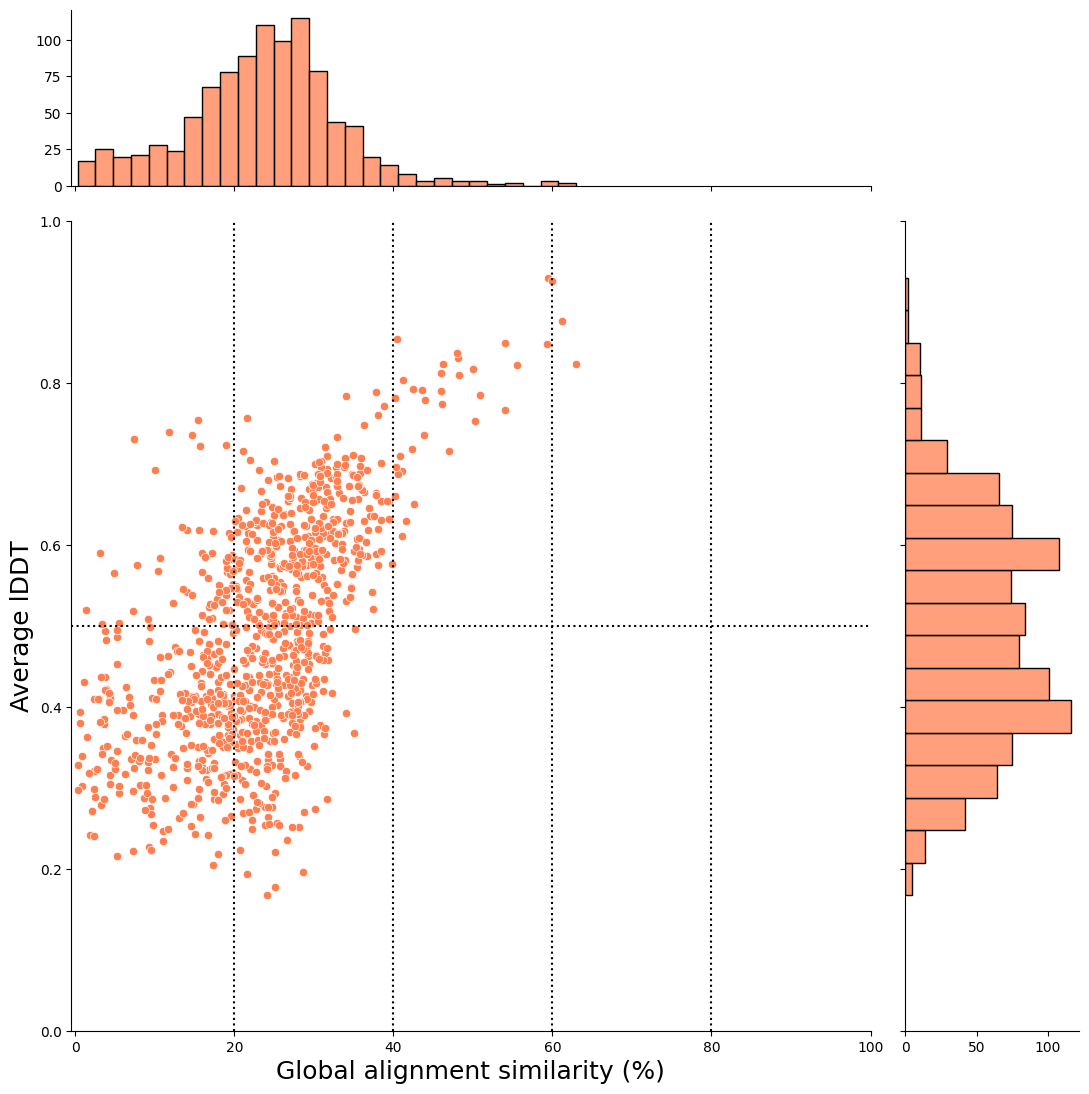

In [19]:
foldseek_filter_viz_pd = foldseek_filter_viz.to_pandas()

plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_filter_viz_pd,
    x="Similarity_percent_needle",
    y="lddt",
    color="coral",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100)
plt.ylim(0,1)
plt.xlabel("Global alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

<Figure size 4000x4000 with 0 Axes>

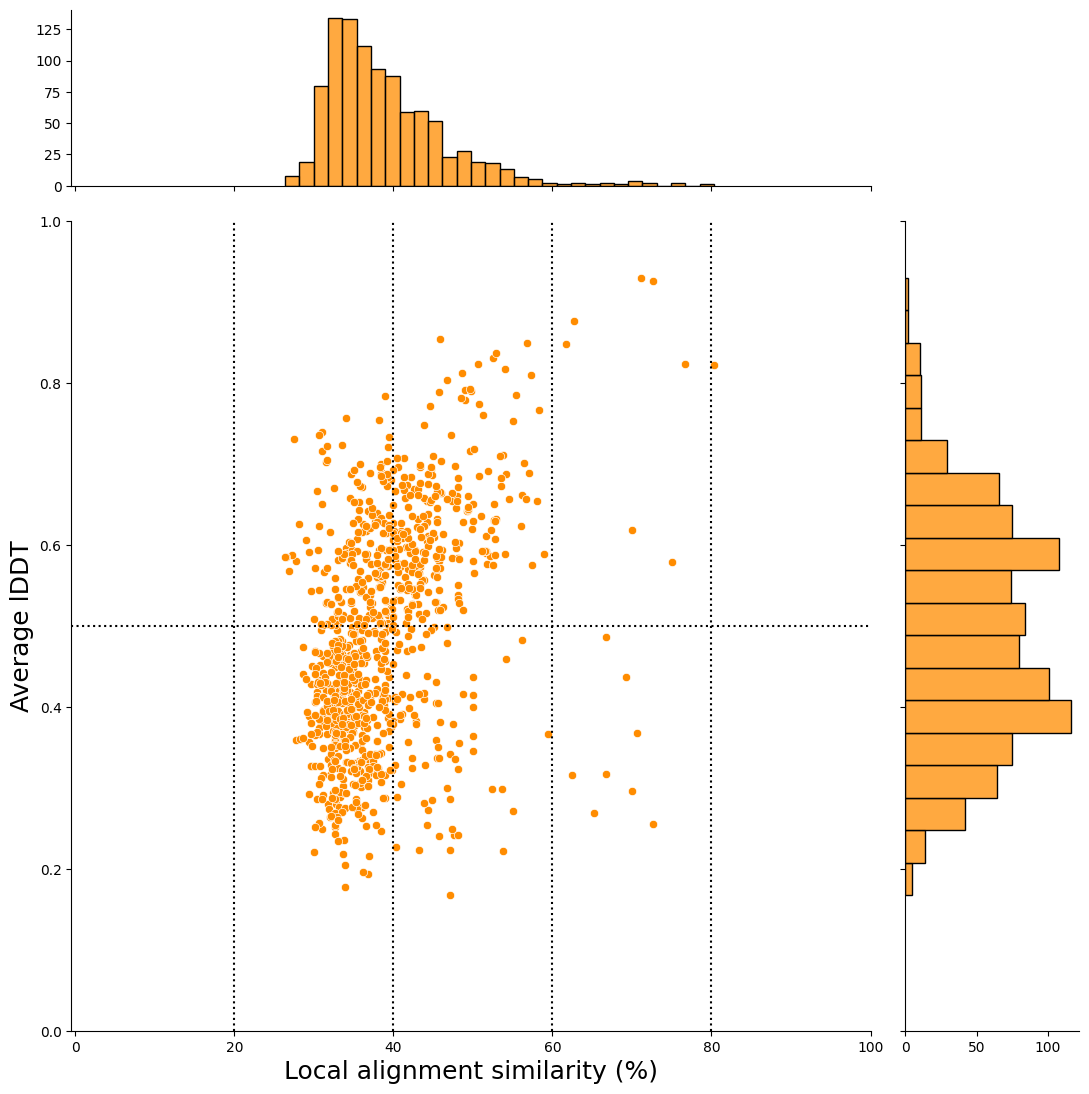

In [20]:
foldseek_filter_viz_pd = foldseek_filter_viz.to_pandas()

plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_filter_viz_pd,
    x="Similarity_percent_water",
    y="lddt",
    color="darkorange",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100)
plt.ylim(0,1)
plt.xlabel("Local alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")

plt.axhline(y=0.5, color="black", linestyle=":")
plt.show()

&nbsp;

&nbsp;
